# Many Variables  GHZ

In [1]:
print('Started!')
from system import *
s1 = system('o-o-x-o-',MMA=True,ManyVariables = True)
#s1 = load_object('GHZ')

Started!
Initializing system o-o-x-o-  ...
Constructing states and excitations...
Constructing ground and first-excited statespace...
Constructing gs_hamiltonian ...
Constructing e1_hamiltonian ...
Constructing interactions V_plus and V_minus ...
Constructing NJ_hamiltonian  ...
Inverting NJ_hamiltonian  ...
Constructing eff_hamiltonian and effective lindblau operators ...

System  o-o-x-o-  initialized in 651.6 seconds.


# Effective Hamiltonian Matrix obtain 

In [2]:
n = 1/2  #exponent

total_indices = s1.variable_index

var('De1', domain='positive')
var('Deg1', domain='positive' , latex_name =r'{{\Delta e}}_{{  1}}^\gamma')
var('De2', domain='positive')
var('Deg2', domain='positive' , latex_name =r'{{\Delta e}}_{{  2}}^\gamma')
var('De3', domain='positive')
var('Deg3', domain='positive' , latex_name =r'{{\Delta e}}_{{  3}}^\gamma')    

var('gamma','DE','De','g','g_f','Omega','v','gamma_f','gamma_g','phi',domain='positive')
var('DEg', domain='positive' , latex_name =r'{{\Delta E}}^\gamma')
var('kappa_c','kappa_b',domain='positive')
var('C',domain='positive')
var('c',domain='positive',  latex_name =r'c')
var('r_f',domain='positive',latex_name =r'r_f')
var('r_g',domain='positive',latex_name =r'r_g')
var('R_f',domain='positive')#ratio  (g_f/g)^2
eff_hamiltonian_tayl = sg.copy( s1.eff_hamiltonian.parent().zero())
for diag in s1.pos_gs:
    print(f'Calculating {diag} out of {s1.pos_gs}...')
    min_expr_len = 10**10
    for term in range(1):
        b = s1.eff_hamiltonian[diag,diag]
        b = b.operands()[1].operands()[term]
        if len(str(b))<10: #we isolated Omega^2 instead of one of the conjugate pairs
            b = s1.eff_hamiltonian[diag,diag].operands()[0].operands()[term]
        
        b = b._mathematica_().ReplaceAll(f'DE->DEg*gamma*C^({n})')._sage_()
        #b = b.subs(DE = DEg*gamma*C^n)
        
        b = b._mathematica_().ReplaceAll(f'De1->Deg1*gamma*C^({n})')._sage_()
        #b = b.subs(De1 = Deg1*gamma*C^n) #sqrt C scaling!?
        
        b = b._mathematica_().ReplaceAll(f'De2->Deg2*gamma*C^({n})')._sage_()
        #b = b.subs(De2 = Deg2*gamma*C^n) #MAKE ZERO
        
        b = b._mathematica_().ReplaceAll(f'De3->Deg2*gamma*C^({n})')._sage_()
        #b = b.subs(De3 = Deg3*gamma*C^n) #MAKE ZERO  
        
        #b = b.subs(phi = phi_val)
        
        #b = MMA_simplify(b)
        
        #b = b._mathematica_().ReplaceAll('g_f->g*(R_f)^(1/2)')._sage_()
        b = b.subs(g_f=g*(R_f)^(1/2))

        b = b._mathematica_().ReplaceAll('gamma_f->gamma*r_f')._sage_()
        #b = b.subs(gamma_f=gamma*r_f)

        b = b._mathematica_().ReplaceAll('gamma_g->gamma*r_g')._sage_()
        #b = b.subs(gamma_g=gamma*r_g)
        
        #b = b._mathematica_().ReplaceAll("g-> (C*gamma*kappa_c)^(1/2)")._sage_()
        b = b.subs(g = (C*gamma*kappa_c)^(1/2)) 
        
        b = b._mathematica_().ReplaceAll('v->(c*kappa_b*kappa_c)^(1/2)')._sage_()
        #b = b.subs(v = (c*kappa_b*kappa_c)^(1/2) )
        
        

        #Substitutions
        #b = b.subs(c=np.pi,R_f=2.1,Deg=np.e,DEg=np.sqrt(5),r_g=np.sqrt(3),r_f=np.sqrt(2), phi=phi_val) 
        #b = b.subs(phi=phi_val)

        #b = b._mathematica_().Factor()._sage_()
        #b = b._mathematica_().Together()._sage_()


        b = SR(str(b).replace('Sqrt','sqrt'))
        if len(str(b))<min_expr_len:
            min_expr_len = len(str(b))
            h_eff = b
    
    h_eff = h_eff.subs(c=C)
    h_eff = MMA_simplify(h_eff)
    '''
    h_eff = SR(str(h_eff).replace('Sqrt','sqrt'))
    var('x')
    h_eff = h_eff.subs(C=1/x)
    h_eff = MMA_simplify(h_eff)
    h_eff = h_eff._mathematica_().Series((x,0,1)).Normal()._sage_()
    h_eff = h_eff.subs(x=1/C)
    '''
    h_eff = SR(str(h_eff).replace('Sqrt','sqrt'))
    eff_hamiltonian_tayl[diag,diag] = h_eff  * Omega^2 / 2

print('\n Done! ')
#show(symround(eff_hamiltonian_tayl[s1.pos_gs,s1.pos_gs],digits=3))


eff_hamiltonian_tayl_temp = eff_hamiltonian_tayl[s1.pos_gs,s1.pos_gs] 





lind_op_number = len(s1.lindblau_list)

eff_lind_taylor = []
eff_lind = []
eff_lind_coeff = []
for lind_op in range(lind_op_number):
    print(f'{lind_op} out of {lind_op_number-1}')
    eff_lind_taylor.append([])
    eff_lind.append([])
    L_matrix = s1.eff_lindblau_list[lind_op]
    L_nonzeros = []
    L_nonzeros_pos = []
    for i in  range(L_matrix.nrows()):
        for j in  range(L_matrix.ncols()):
            if not str(symround(L_matrix[i,j]))==str(0):
                L_nonzeros.append(L_matrix[i,j])
                L_nonzeros_pos.append((i,j))
    eff_lind_coeff.append(s1.L_coeffs[lind_op])
    
    for which in range(len(L_nonzeros)):

        L_elem = L_nonzeros[which]
        b = L_elem
        
        b = b._mathematica_().ReplaceAll(f'DE->DEg*gamma*C^({n})')._sage_()
        #b = b.subs(DE = DEg*gamma*C^n)
        
        b = b._mathematica_().ReplaceAll(f'De1->Deg1*gamma*C^({n})')._sage_()
        #b = b.subs(De1 = Deg1*gamma*C^n) #sqrt C scaling!?
        
        b = b._mathematica_().ReplaceAll(f'De2->Deg2*gamma*C^({n})')._sage_()
        #b = b.subs(De2 = Deg2*gamma*C^n) #MAKE ZERO
        
        b = b._mathematica_().ReplaceAll(f'De3->Deg2*gamma*C^({n})')._sage_()
        #b = b.subs(De3 = Deg3*gamma*C^n) #MAKE ZERO  
        
        #b = b.subs(phi = phi_val)
        
        #b = MMA_simplify(b)
        
        #b = b._mathematica_().ReplaceAll('g_f->g*(R_f)^(1/2)')._sage_()
        b = b.subs(g_f=g*(R_f)^(1/2))

        b = b._mathematica_().ReplaceAll('gamma_f->gamma*r_f')._sage_()
        #b = b.subs(gamma_f=gamma*r_f)

        b = b._mathematica_().ReplaceAll('gamma_g->gamma*r_g')._sage_()
        #b = b.subs(gamma_g=gamma*r_g)
        
        #b = b._mathematica_().ReplaceAll("g-> (C*gamma*kappa_c)^(1/2)")._sage_()
        b = b.subs(g = (C*gamma*kappa_c)^(1/2)) 
        
        b = b._mathematica_().ReplaceAll('v->(c*kappa_b*kappa_c)^(1/2)')._sage_()
        
        b = b.subs(c=C)
        
        b = SR(str(b).replace('Sqrt','sqrt'))
        
        eff_lind[lind_op].append(b)
        
print('\n Done!')


eff_hamiltonian_tayl = eff_hamiltonian_tayl_temp

a = eff_hamiltonian_tayl[0,0]
#a = symround( MMA_simplify(a,full=False) ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
#b = symround(MMA_simplify(b,full=False),digits = 14)
c = eff_hamiltonian_tayl[3,3]
#c = symround(MMA_simplify(c,full=False),digits = 14)
d = eff_hamiltonian_tayl[4,4]
#d = symround(MMA_simplify(d,full=False),digits = 14)
e = eff_hamiltonian_tayl[5,5]
#e = symround(MMA_simplify(e,full=False),digits = 14)
f = eff_hamiltonian_tayl[7,7]
#f = symround(MMA_simplify(f,full=False),digits = 14)

Calculating 0 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 1 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 18 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 19 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 48 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 49 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 66 out of [0, 1, 18, 19, 48, 49, 66, 67]...
Calculating 67 out of [0, 1, 18, 19, 48, 49, 66, 67]...

 Done! 
0 out of 12
1 out of 12
2 out of 12
3 out of 12
4 out of 12
5 out of 12
6 out of 12
7 out of 12
8 out of 12
9 out of 12
10 out of 12
11 out of 12
12 out of 12

 Done!


# Isolate highest powers

In [3]:
a = eff_hamiltonian_tayl[0,0]
a = symround(a ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
b = symround(b,digits = 14)
c = eff_hamiltonian_tayl[3,3]
c = symround(c,digits = 14)
d = eff_hamiltonian_tayl[4,4]
d = symround(d,digits = 14)
e = eff_hamiltonian_tayl[5,5]
e = symround(e,digits = 14)
f = eff_hamiltonian_tayl[7,7]
f = symround((f),digits = 14)


#SUBSTITUTIONS
phival = 0 * np.pi 
R_fval = 1
gamma_fval = gamma
gamma_gval = gamma


#modify abcdef
a = (a + conjugate(a)).subs(phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
b = (b + conjugate(b)).subs(phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
c = (c + conjugate(c)).subs(phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
d = (d + conjugate(d)).subs(phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
e = (e + conjugate(e)).subs(phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
f = (f + conjugate(f)).subs(phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()

a = symround(a,digits = 14)
b = symround(b,digits = 14)
c = symround(c,digits = 14)
d = symround(d,digits = 14)
e = symround(e,digits = 14)
f = symround(f,digits = 14)

symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient 1.1102230246252e-16
symround: Deleted coefficient -2.7755575615629e-17
symround: Deleted coefficient -1.6653345369377e-16
symround: Deleted coefficient -8.3266726846887e-17
symround: Deleted coefficient 6.9388939039072e-18
symround: Deleted coefficient -5.1810407815841e-16
symround: Deleted coefficient -1.0234868508263e-16
symround: Deleted coefficient 1.7000290064573e-16
symround: Deleted coefficient 4.4408920985006e-16
symround: Deleted coefficient -1.3877787807814e-17
symround: Deleted coefficient -1.30104260698

symround: Deleted coefficient 1.2352563814125e-22
symround: Deleted coefficient 5.5511151231258e-17
symround: Deleted coefficient 1.0408340855861e-17
symround: Deleted coefficient 2.0469737016526e-16
symround: Deleted coefficient -2.0816681711722e-16
symround: Deleted coefficient 1.4222564098665e-15
symround: Deleted coefficient 5.3798111798731e-16
symround: Deleted coefficient -1.8905775382716e-18
symround: Deleted coefficient -9.1731635308567e-16
symround: Deleted coefficient 3.6602665343111e-16
symround: Deleted coefficient -7.5724745484534e-19
symround: Deleted coefficient -5.8565710151874e-15
symround: Deleted coefficient -1.9879863272058e-18
symround: Deleted coefficient 2.2126397936084e-15
symround: Deleted coefficient 1.3035837058244e-18
symround: Deleted coefficient 4.6096662366842e-15
symround: Deleted coefficient 9.7357966957409e-18
symround: Deleted coefficient 1.3795388442706e-15
symround: Deleted coefficient -8.2918878649881e-18
symround: Deleted coefficient -8.4703294725

symround: Deleted coefficient 1.9866649558081e-16
symround: Deleted coefficient 9.0632525356210e-20
symround: Deleted coefficient 3.3306690738755e-16
symround: Deleted coefficient 2.3076339739544e-16
symround: Deleted coefficient 2.1316995839233e-20
symround: Deleted coefficient -1.2836953722228e-16
symround: Deleted coefficient -4.6908006992585e-16
symround: Deleted coefficient -6.0986372202310e-20
symround: Deleted coefficient -9.7289074944366e-16
symround: Deleted coefficient 6.2395835026541e-17
symround: Deleted coefficient 3.4777761092683e-19
symround: Deleted coefficient 2.2898349882894e-16
symround: Deleted coefficient -7.9499124297500e-17
symround: Deleted coefficient -1.0028870095491e-18
symround: Deleted coefficient -1.2407709188295e-24
symround: Deleted coefficient 1.3308220266535e-15
symround: Deleted coefficient -9.5544638823927e-16
symround: Deleted coefficient 1.4103098571784e-19
symround: Deleted coefficient -3.0531133177192e-16
symround: Deleted coefficient -1.04029198

symround: Deleted coefficient -2.0925101928970e-17
symround: Deleted coefficient 7.0473141211558e-19
symround: Deleted coefficient -1.0587911840679e-22
symround: Deleted coefficient -6.8304736866587e-18
symround: Deleted coefficient -6.1960460091652e-19
symround: Deleted coefficient 2.9778502051909e-23
symround: Deleted coefficient 3.1908069936248e-16
symround: Deleted coefficient 1.7279472123988e-18
symround: Deleted coefficient 4.7645603283054e-22
symround: Deleted coefficient 1.8259997463729e-16
symround: Deleted coefficient -8.0115243710768e-18
symround: Deleted coefficient -3.2442023624330e-21
symround: Deleted coefficient 1.4658413372004e-16
symround: Deleted coefficient 3.8461119156858e-18
symround: Deleted coefficient 3.7719435932418e-21
symround: Deleted coefficient -1.0245710529988e-16
symround: Deleted coefficient -1.9077405433653e-17
symround: Deleted coefficient -2.6469779601697e-21
symround: Deleted coefficient -7.7195194680968e-17
symround: Deleted coefficient -3.7975028

symround: Deleted coefficient 1.9885421925775e-21
symround: Deleted coefficient -3.3881317890172e-21
symround: Deleted coefficient 3.0157626499329e-26
symround: Deleted coefficient 6.0315252998658e-26
symround: Deleted coefficient 1.5811281682080e-20
symround: Deleted coefficient -4.8252202398927e-25
symround: Deleted coefficient -1.2063050599732e-24
symround: Deleted coefficient 1.7370792863614e-23
symround: Deleted coefficient -1.1580528575742e-23
symround: Deleted coefficient 1.1580528575742e-23
symround: Deleted coefficient 3.8601761919141e-24
symround: Deleted coefficient 3.8601761919141e-24
symround: Deleted coefficient 5.7902642878712e-24
symround: Deleted coefficient -1.3969426184796e-20
symround: Deleted coefficient -3.3087224502121e-22
symround: Deleted coefficient -5.8591960055839e-25
symround: Deleted coefficient 4.2351647362715e-22
symround: Deleted coefficient 7.7548182426846e-25
symround: Deleted coefficient -1.6543612251061e-20
symround: Deleted coefficient 1.3958672836

In [4]:
term_list = [a,b,c,d,e,f]
high_c_limit = [  ]

for term in term_list:
    num = term._mathematica_().Numerator().Collect('C')._sage_().collect(C).operands()[0]
    i = 1
    while num.has(C)==False:
        num = term._mathematica_().Numerator().Collect('C')._sage_().collect(C).operands()[i]
        i  = i + 1
        print(i)

    den= term._mathematica_().Denominator()._sage_().expand()._mathematica_().Collect('C')._sage_().collect(C).operands()[0]
    i = 1
    while den.has(C)==False:
        den = term._mathematica_().Denominator().Collect('C')._sage_().collect(C).operands()[i]
        i= i + 1
    num = symround(num,digits=14,show_del=False)
    den = symround(den,digits=14,show_del=False)
    tayl = num/den
    if len(high_c_limit)<=5:
        tayl = MMA_simplify(tayl,full=True)
    high_c_limit.append(tayl)

In [5]:
a = high_c_limit[0]
b = high_c_limit[1]
c = high_c_limit[2]
d = high_c_limit[3]
e = high_c_limit[4]
f = high_c_limit[5]

In [89]:
show(a,b,c,d,e)

4*DEg*Omega^2/(C^1.50000000000000*gamma) Omega^2/(sqrt(C)*(DEg + Deg2)*gamma) 2*Omega^2/((2*DEg*gamma + Deg2*gamma)*sqrt(C)) Omega^2/(sqrt(C)*(DEg + Deg1)*gamma) (Deg1 + Deg2)*Omega^2/((DEg*(Deg1 + Deg2) + Deg1*Deg2)*sqrt(C)*gamma)

In [90]:
show(symround(f))

(-0.50*DEg*Deg1 - 0.25*DEg*Deg2 - 0.25*Deg1*Deg2)*Deg1*Deg2*Omega^2/((DEg*(Deg1 + 0.50*Deg2)*Deg1*Deg2 + 0.25*Deg1^2*Deg2^2 + (Deg1^2 + Deg1*Deg2 + 0.25*Deg2^2)*DEg^2)*sqrt(C)*DEg*gamma)

In [91]:
q = symround(f.subs(Deg1=DEg,Deg2=DEg),show_del=False).subs(DEg=1)
qn = symround(q._mathematica_().Numerator().Collect('C')._sage_(),show_del=False)
qd = symround(q._mathematica_().Denominator().Collect('C')._sage_(),show_del=False)
show(qn)

-0.25*Omega^2/sqrt(C)

In [73]:
show(symround(qd.subs(DEg=1).expand()._mathematica_().Collect('C')._sage_(),show_del=False))

28.*C^21*gamma + 248*C^20*gamma + 3.5*I*C^20.*gamma + 976*C^19*gamma + 17*I*C^18.*gamma + 2272*C^18*gamma - 20*I*C^18.*gamma + 3584*C^17*gamma + 14*I*C^16.*gamma + 3936*C^16*gamma - 3.5*I*C^16.*gamma + 3168*C^15*gamma - 19*I*C^14.*gamma + 1888*C^14*gamma + 3.8*I*C^14.*gamma + 872*C^13*gamma + 1.3*I*C^12.*gamma + 304*C^12*gamma - 0.031*I*C^12.*gamma + 82*C^11*gamma + 0.072*I*C^10.*gamma + 17.*C^10*gamma + 0.0078*I*C^9.5*gamma + 2.8*C^9*gamma + 0.00012*I*C^8.5*gamma + 0.36*C^8*gamma + 0.00031*I*C^7.5*gamma + 0.035*C^7*gamma - 0.000014*I*C^6.5*gamma + 0.0027*C^6*gamma + (1.8e-6*I)*C^5.5*gamma + 0.00016*C^5*gamma + (1.5e-8*I)*C^4.5*gamma + (7.0e-6)*C^4*gamma + (2.4e-9*I)*C^3.5*gamma + (2.3e-7)*C^3*gamma - (1.8e-11*I)*C^2.5*gamma + (4.9e-9)*C^2*gamma + (6.5e-11)*C*gamma

# $t_g$ calculation

In [6]:
t_den = ( e - b - d)._mathematica_().Together()._sage_() # a omitted due to scalings

ttden = symround(t_den, show_del=True,digits=14  )
numnum = 0
dennum = 0
'''
while True:
    print(f'numnum={numnum}  ,  dennum={dennum}')
    num = ttden._mathematica_().Numerator().Collect('C')._sage_().operands()[numnum]
    den = ttden._mathematica_().Denominator().Collect('C')._sage_().operands()[dennum]
    tayl = num/den
    taylsimp = MMA_simplify(tayl,full=True)
    retaylsimp = taylsimp  #(taylsimp+conjugate(taylsimp))   #/2
    taylf = retaylsimp._mathematica_().Together()._sage_()
    taylf = symround(taylf,digits=14)
    if str(taylf) == str(0):
        numnum += 1
    else:
        break
'''
        
print('Finished!')

tg = np.pi / ttden

Finished!


In [7]:
show(symround(MMA_simplify(tg,full=True).subs()))

-3.2*(DEg*(Deg1 + Deg2) + Deg1*Deg2)*sqrt(C)*(DEg + Deg1)*(DEg + Deg2)*gamma/((DEg*(Deg1 + Deg2) + 2*Deg1*Deg2)*DEg*Omega^2)

# condition 1 calculation

In [8]:
t_den = ( c - 2*b )._mathematica_().Together()._sage_() # a omitted due to scalings


ttden = symround(t_den, show_del=True,digits=14  )

print('Finished!')

cond1 = tg*ttden

Finished!


In [9]:
show(symround(MMA_simplify(cond1,full= True).subs(),digits =5))

(DEg*(Deg1 + Deg2) + Deg1*Deg2)*(6.2832*DEg + 6.2832*Deg1)/((DEg*(Deg1 + Deg2) + 2*Deg1*Deg2)*(2*DEg + Deg2))

# condition 2 calculation

In [10]:
# f added
t_den = ( - 2*b -d + f )._mathematica_().Together()._sage_() # a omitted due to scalings

ttden = symround(t_den, show_del=True,digits=14 )

taylnf = ttden
show(symround(taylnf,show_del=False))

cond2 = taylnf*tg
cond2 = MMA_simplify(cond2,full=not True)

-(3*DEg^4*Deg1^2*Omega^2 + 2*DEg^3*Deg1^3*Omega^2 + 3*DEg^4*Deg1*Deg2*Omega^2 + 6.5*DEg^3*Deg1^2*Deg2*Omega^2 + 2.5*DEg^2*Deg1^3*Deg2*Omega^2 + 0.75*DEg^4*Deg2^2*Omega^2 + 3.2*DEg^3*Deg1*Deg2^2*Omega^2 + 3.8*DEg^2*Deg1^2*Deg2^2*Omega^2 + 1.2*DEg*Deg1^3*Deg2^2*Omega^2 + 0.25*DEg^3*Deg2^3*Omega^2 + 0.75*DEg^2*Deg1*Deg2^3*Omega^2 + 0.75*DEg*Deg1^2*Deg2^3*Omega^2 + 0.25*Deg1^3*Deg2^3*Omega^2)/((DEg^2*Deg1^2 + DEg^2*Deg1*Deg2 + DEg*Deg1^2*Deg2 + 0.25*DEg^2*Deg2^2 + 0.50*DEg*Deg1*Deg2^2 + 0.25*Deg1^2*Deg2^2)*sqrt(C)*(DEg + Deg1)*(DEg + Deg2)*DEg*gamma)

In [11]:
show(symround(MMA_simplify(cond2,full= True),show_del=False))

(DEg*Deg1^2*(0.42*Deg1 + 0.25*Deg2)*Deg2^2 + 0.083*Deg1^3*Deg2^3 + (Deg1^2 + Deg1*Deg2 + 0.25*Deg2^2)*DEg^4 + (0.84*Deg1^2 + 1.2*Deg1*Deg2 + 0.25*Deg2^2)*DEg^2*Deg1*Deg2 + (0.66*Deg1^3 + 2.2*Deg1^2*Deg2 + 1.1*Deg1*Deg2^2 + 0.083*Deg2^3)*DEg^3)*(9.4*DEg*(Deg1 + Deg2) + 9.4*Deg1*Deg2)/((DEg*(Deg1 + 0.50*Deg2)*Deg1*Deg2 + 0.25*Deg1^2*Deg2^2 + (Deg1^2 + Deg1*Deg2 + 0.25*Deg2^2)*DEg^2)*(DEg*(Deg1 + Deg2) + 2*Deg1*Deg2)*DEg^2)

# a bit of processing of the conditions. Use of $D_i = \dfrac{Deg_i}{DEg}$

In [12]:
cond1 = MMA_simplify(cond1,full=True)
show(symround(cond1))
print('\n\n\n')
cond2 = MMA_simplify(cond2,full=True)
show(symround(cond2))

(DEg*(Deg1 + Deg2) + Deg1*Deg2)*(6.3*DEg + 6.3*Deg1)/((DEg*(Deg1 + Deg2) + 2*Deg1*Deg2)*(2*DEg + Deg2))

(DEg*Deg1^2*(0.42*Deg1 + 0.25*Deg2)*Deg2^2 + 0.083*Deg1^3*Deg2^3 + (Deg1^2 + Deg1*Deg2 + 0.25*Deg2^2)*DEg^4 + (0.84*Deg1^2 + 1.2*Deg1*Deg2 + 0.25*Deg2^2)*DEg^2*Deg1*Deg2 + (0.66*Deg1^3 + 2.2*Deg1^2*Deg2 + 1.1*Deg1*Deg2^2 + 0.083*Deg2^3)*DEg^3)*(9.4*DEg*(Deg1 + Deg2) + 9.4*Deg1*Deg2)/((DEg*(Deg1 + 0.50*Deg2)*Deg1*Deg2 + 0.25*Deg1^2*Deg2^2 + (Deg1^2 + Deg1*Deg2 + 0.25*Deg2^2)*DEg^2)*(DEg*(Deg1 + Deg2) + 2*Deg1*Deg2)*DEg^2)

In [13]:
var('D1', domain='positive',latex_name='D_1')
var('D2', domain='positive',latex_name='D_2')
cond1sub = cond1.subs(Deg1 = DEg *D1 , Deg2 = DEg *D2 )
cond1sub = MMA_simplify(cond1sub,full=True)
cond2sub = cond2.subs(Deg1 = DEg *D1 , Deg2 = DEg *D2 )
cond2sub = MMA_simplify(cond2sub,full=True)

In [14]:
show(symround(cond1sub))
print('\n\n')
show(symround(cond2sub))

(D1*D2 + D1 + D2)*(6.3*D1 + 6.3)/((2*D1*D2 + D1 + D2)*(D2 + 2))

((((D2 + 5)*D2 + 10)*D2 + 8)*D1^3 + ((3*(D2 + 5)*D2 + 26)*D2 + 12)*D1^2 + ((3*D2 + 13)*D2 + 12)*D1*D2 + (D2 + 3)*D2^2)*(1.6*D1*(D2 + 1) + 1.6*D2)/((D1^2*(D2 + 2)^2 + 2*D1*(D2 + 2)*D2 + D2^2)*(D1*D2 + 0.50*D1 + 0.50*D2))

(4.188790205*D1^2 + 6.283185307*D1 + 2.094395102)/(3*D1 + 1)

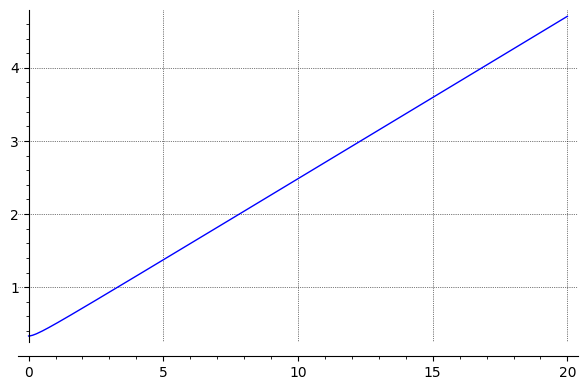

In [15]:
DEgval = 1
D2val  = 1
 
show(symround(MMA_simplify(cond1sub.subs(D2=D2val)),digits=10))

plot(cond1sub.subs(DEg=DEgval,D2=D2val)/(2*np.pi),(D1,0,20), gridlines=True)

(5.585053606*D1^4 + 15.82431855*D1^3 + 13.03179175*D1^2 + 4.188790205*D1 + 0.4654211339)/(D1^3 + D1^2 + 0.3333333333*D1 + 0.03703703704)

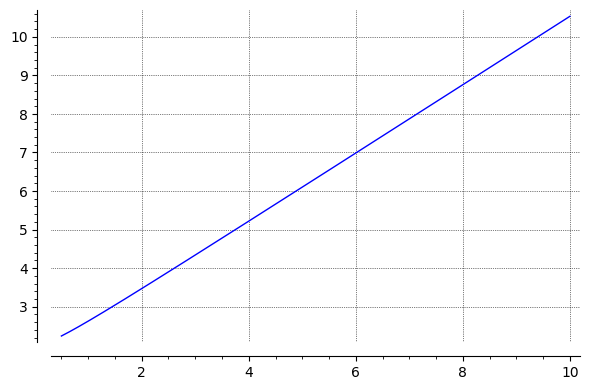

In [16]:
show(symround(MMA_simplify(cond2sub.subs(D2=D2val)),digits=10))
plot(cond2sub.subs(DEg=DEgval,D2=D2val)/(2*np.pi),(D1,0.5,10), gridlines=True)

# Search for a solution of both conditions

In [18]:
#search for simultaneous roots
tol =1e-6

D2val= 0.8 # starting value
DEgval = 1
D1val = 1

valp=10
p = -4

minsol = 1
count = 0
while count<1000:
    k = 1
    
    D2val = D2val - 10^p
    eq1s = cond1sub.subs(D2=D2val , DEg=DEgval) ==  k *2*np.pi
    #eq1s = MMA_simplify(eq1s)
    sol = eq1s._mathematica_().NSolve("PositiveReals")[1][1][2]._sage_()
    #eq1s = eq1s.numerator()/eq1s.denominator()
    #eq = eq1s+2*np.pi == 0 #2*pi ??
    #sol = solve(eq,D2)
    #sol = sol[0].rhs().n()

    eq2s = cond2sub.subs(D2=D2val , DEg=DEgval, D1=sol)/(2*np.pi)

    val = np.mod(float(abs(eq2s.n())) , 1)

    #val = abs(eq2s-2*np.pi)

    if val > 0.5:
        val = 1-val

    #print(f'precision: {p}')


    if abs(val)<tol:
        break

    if abs(val)<abs(valp):
        valp = val
        minsolD1 = sol
        minsolD2 = D2val
            #print(D2val.n(), valp)
    
    count = count + 1

    
print('Finished')

print('\n\n')

print(valp ,minsolD1 ,minsolD2)


Finished



3.585702287089987e-06 2.783806519590723 0.756100000000005


# Check how close to ideal the solutions are

In [19]:
cond1sub.subs(DEg=1,D1=minsolD1,D2=minsolD2)/(2*np.pi)

0.999999999999997

In [20]:
cond2sub.subs(DEg=1,D1=minsolD1,D2=minsolD2)/(2*np.pi)

4.00000358570229

In [21]:
print(minsolD1.n(),minsolD2)

2.78380651959072 0.756100000000005


# Test if gate works

In [48]:
# parameter substitution 
Cval = 10^3
phival = 0* np.pi 
R_fval = 1
gamma_fval = gamma
gamma_gval = gamma
DEgval = 1
Deg2val = DEgval*minsolD2  #*0.99999
Deg1val = DEgval*minsolD1   #*0.99999


In [49]:
eff_hval = eff_hamiltonian_tayl.subs(DEg=DEgval,C=Cval,phi=phival,R_f=R_fval,gamma_f=gamma_fval,gamma_g=gamma_gval,Deg2=Deg2val,Deg1= Deg1val)
eff_hval = (eff_hval + conjugate(eff_hval))

a_val = eff_hval[0,0]
b_val = eff_hval[1,1]
c_val = eff_hval[3,3]
d_val = eff_hval[4,4]
e_val = eff_hval[5,5]
f_val = eff_hval[7,7]

In [50]:
U = sg.copy(eff_hval)

tgval = np.pi /(a_val+e_val-b_val-d_val)

t1 = (a_val-b_val)*tgval
t2 = t1
t3 = (a_val-d_val)*tgval

R = [0 , t1, t2, t1+t2, t3, t1+t3, t2+t3, t1+t2+t3 ]

for i in range(8):
    U[i,i] = exp( (R[i] + (eff_hval[i,i]-a_val)*tgval )*I )
    
for i in range(8):
    U[i,i] = U[i,i].n()

In [51]:
show(symround(U,digits=5))

symround: Deleted coefficient 1.2246e-16
symround: Deleted coefficient 1.2246e-16


[                   1                    0                    0                    0                    0                    0                    0                    0]
[                   0                    1                    0                    0                    0                    0                    0                    0]
[                   0                    0                    1                    0                    0                    0                    0                    0]
[                   0                    0                    0 0.99968 + 0.025347*I                    0                    0                    0                    0]
[                   0                    0                    0                    0                    1                    0                    0                    0]
[                   0                    0                    0                    0                    0                   -1                    0                    0]
[                   0                    0                    0                    0                    0                    0                   -1                    0]
[                   0                    0                    0                    0                    0                    0                    0  0.97655 + 0.21531*I]

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Check scalings of the above result

In [323]:
# functions to obtain scalings
def obtain_exponent(expr):
    expr = SR(str(( expr)).replace('Sqrt','sqrt'))
    try:
        exp = expr.op[0].op[0].op[0].op[1]
    except:
        try:
            exp = expr.op[0].op[0].op[1]
        except:
            try:
                exp = expr.op[0].op[1]
            except:
                exp = 0
    return exp

def obtain_expr_exp(expr):
    try:
        el = 0    
        q = (expr._mathematica_().Numerator()._sage_() .expand().operands()[el])
        q = SR(str(( q)).replace('Sqrt','sqrt'))
        test_bool = (str(q._mathematica_().Numerator()._sage_().expand().denominator()) == str(1))
        num_exp = (obtain_exponent(q._mathematica_().Numerator()._sage_().expand()))
        den1_exp = (obtain_exponent(q._mathematica_().Denominator()._sage_().expand()))
        den2_exp = (obtain_exponent(expr._mathematica_().Denominator()._sage_().expand()))
        res = num_exp-den1_exp-den2_exp
        if not test_bool:
            #show(q)
            res = obtain_exponent(q.numerator())-obtain_exponent(q.denominator())
            return res
        return res
    except:
        #print('altern')
        den_exp = obtain_exponent( expr._mathematica_().Denominator()._sage_().expand())
        num_exp = obtain_exponent( expr._mathematica_().Numerator()._sage_().expand())
        return num_exp-den_exp

# L elements

In [325]:
mx = -100   #maximum value of exponent
m = 1       #exponent of detunings

phival = 0 * np.pi 
R_fval = 1
gammaval = 1
kappa_cval = 1
kappa_bval = 1
gamma_fval = gammaval
gamma_gval = gammaval
DEgval = 1
Deg2val = DEgval*minsolD2  #*0.99999
Deg1val = DEgval*minsolD1

for lindop in range(13):
    show(lindop,eff_lind_coeff[lindop]  )
    pos = 0
    more = True
    while(more):
        try: 
            err = eff_lind[lindop][pos].subs(kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival)
            err = err*conjugate(err)
            err = err._mathematica_().Together()._sage_() 
            exp = obtain_expr_exp(err)
            if exp > mx:
                mx = exp
            pos += 1
            print(exp)
        except IndexError:
            more = False

0 sqrt(kappa_c)

-1
-1
-1
-1
-1
-1
-1
-1


1 sqrt(gamma)

-1
-1
-1
-1


2 sqrt(kappa_b)

-2
-1
-1
-2
-1
-1
-1
-1


3 sqrt(kappa_c)

-1
-1
-1
-1
-1
-1
-1
-1


4 sqrt(gamma)

-1
-1
-1
-1


5 sqrt(kappa_b)

-2
-1
-1
-1
-1
-1
-1
-1


6 sqrt(kappa_c)

-1
-1
-1
-1
-1
-1
-1
-1


7 sqrt(gamma_g)

-2
-1
-1
-1
-1
-1
-1
-1


8 sqrt(gamma_f)

-2
-1
-1
-1
-1
-1
-1
-1


9 sqrt(kappa_b)

-2
-1
-1
-1
-1
-1
-1
-1


10 sqrt(kappa_c)

-1
-1
-1
-1
-1
-1
-1
-1


11 sqrt(gamma)

-1
-1
-1
-1


12 sqrt(kappa_b)

-2
-1
-1
-2
-1
-1
-1
-1


In [327]:
show(symround(err))

symround: Deleted coefficient 5.6e-22
symround: Deleted coefficient -2.2e-22
symround: Deleted coefficient -5.6e-22
symround: Deleted coefficient -2.2e-22


0.0020*(C^11 + 6.4*I*C^10. - 15.*C^10 - 8.2*I*C^9.5 - 25*C^9 - 56*I*C^8.5 + 45*C^8 + 6.4*I*C^7.5 + 14.*C^7 + 9.1*I*C^6.5 + 0.00066*C^6 + 1.8*I*C^5.5 - 0.46*C^5 + 0.11*I*C^4.5 - 0.064*C^4 - 0.0019*I*C^3.5 - 0.0034*C^3 - 0.00051*I*C^2.5 - 0.000046*C^2 - 0.000015*I*C^1.5 + (9.7e-7)*C)*(C^11 - 6.4*I*C^10. - 15.*C^10 + 8.2*I*C^9.5 - 25*C^9 + 56*I*C^8.5 + 45*C^8 - 6.4*I*C^7.5 + 14.*C^7 - 9.1*I*C^6.5 + 0.00066*C^6 - 1.8*I*C^5.5 - 0.46*C^5 - 0.11*I*C^4.5 - 0.064*C^4 + 0.0019*I*C^3.5 - 0.0034*C^3 + 0.00051*I*C^2.5 - 0.000046*C^2 + 0.000015*I*C^1.5 + (9.7e-7)*C)*C^8/((C^9.5 + 3.6*I*C^9 - 3.7*C^8.5 + 0.87*I*C^8 - 3.9*C^7.5 - 2.1*I*C^7 - 0.26*C^6.5 - 0.50*I*C^6 + 0.082*C^5.5 - 0.033*I*C^5 + 0.010*C^4.5 - 0.00019*I*C^4 + 0.00031*C^3.5 + 0.000025*I*C^3)*(C^9.5 - 3.6*I*C^9 - 3.7*C^8.5 - 0.87*I*C^8 - 3.9*C^7.5 + 2.1*I*C^7 - 0.26*C^6.5 + 0.50*I*C^6 + 0.082*C^5.5 + 0.033*I*C^5 + 0.010*C^4.5 + 0.00019*I*C^4 + 0.00031*C^3.5 - 0.000025*I*C^3)*(C^3 + 2.2*I*C^2.5 - 0.99*C^2 + 0.49*I*C^1.5 - 0.21*C + 0.026*I*Sqrt(C) - 0.010)^2*(C^3 - 2.2*I*C^2.5 - 0.99*C^2 - 0.49*I*C^1.5 - 0.21*C - 0.026*I*Sqrt(C) - 0.010)^2)

# $H_{eff}$ elements

In [359]:
a = eff_hamiltonian_tayl[0,0]
#a = symround( MMA_simplify(a,full=False) ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
#b = symround(MMA_simplify(b,full=False),digits = 14)
c = eff_hamiltonian_tayl[3,3]
#c = symround(MMA_simplify(c,full=False),digits = 14)
d = eff_hamiltonian_tayl[4,4]
#d = symround(MMA_simplify(d,full=False),digits = 14)
e = eff_hamiltonian_tayl[5,5]
#e = symround(MMA_simplify(e,full=False),digits = 14)
f = eff_hamiltonian_tayl[7,7]
#f = symround(MMA_simplify(f,full=False),digits = 14)
a = (a + conjugate(a)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
b = (b + conjugate(b)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
c = (c + conjugate(c)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
d = (d + conjugate(d)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
e = (e + conjugate(e)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
f = (f + conjugate(f)).subs(Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()

In [366]:
x = symround(b.subs(kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival))
x = x._mathematica_().Together().sage()
print('Numerator')
show(symround(x._mathematica_().Numerator()._sage_().expand(),digits=5))
print('\n\nDenominator')
show(symround(x._mathematica_().Denominator()._sage_().expand(),digits=5))

symround: Deleted coefficient -1.1e-18
symround: Deleted coefficient -1.4e-19
Numerator


177.84*C^9 + 579.94*C^8 + 618.86*C^7 + 248.50*C^6 + 49.950*C^5 + 5.6347*C^4 + 0.36168*C^3 + 0.012196*C^2 + 0.00016966*C



Denominator
symround: Deleted coefficient -1.1102e-16
symround: Deleted coefficient -8.3267e-17


C^10 + 3.2687*C^9 + 14.816*C^8 + 26.360*C^7 + 19.609*C^6 + 6.6269*C^5 + 1.1931*C^4 + 0.12294*C^3 + 0.0072814*C^2 + 0.00023054*C + 3.0216e-6

# ---------------------------------------------

#  Try $D2 =0$

In [68]:
a = eff_hamiltonian_tayl[0,0]
#a = symround( MMA_simplify(a,full=False) ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
#b = symround(MMA_simplify(b,full=False),digits = 14)
c = eff_hamiltonian_tayl[3,3]
#c = symround(MMA_simplify(c,full=False),digits = 14)
d = eff_hamiltonian_tayl[4,4]
#d = symround(MMA_simplify(d,full=False),digits = 14)
e = eff_hamiltonian_tayl[5,5]
#e = symround(MMA_simplify(e,full=False),digits = 14)
f = eff_hamiltonian_tayl[7,7]
#f = symround(MMA_simplify(f,full=False),digits = 14)


#SUBSTITUTIONS
phival = phi
R_fval = 1
gamma_fval = gamma
gamma_gval = gamma
Deg2val = 0


#modify abcdef
a = (a + conjugate(a)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
b = (b + conjugate(b)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
c = (c + conjugate(c)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
d = (d + conjugate(d)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
e = (e + conjugate(e)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()
f = (f + conjugate(f)).subs(Deg2=Deg2val,phi=phival,R_f=R_fval ,gamma_g = gamma_gval , gamma_f = gamma_fval)._mathematica_().Together()._sage_()

term_list = [a,b,c,d,e,f]
index_list =[0,1,2,3,4,5]
high_c_limit = [  ]

#If we get error/division 0 modify this:
err_term = 0

for (i,term) in enumerate(term_list):
    if i ==5 and err_term!=0:
        err_term -= 1
    num = term._mathematica_().Numerator().Collect('C')._sage_().operands()[err_term]
    
    try:
        den = term._mathematica_().Denominator().Collect('C')._sage_().operands()[0]
    except:
        den= term._mathematica_().Denominator()._sage_().expand()._mathematica_().Collect('C')._sage_().operands()[0]
    tayl = num/den
    tayl = MMA_simplify(tayl,full=True)
    high_c_limit.append(tayl)
    
a = high_c_limit[0]
b = high_c_limit[1]
c = high_c_limit[2]
d = high_c_limit[3]
e = high_c_limit[4]
f = high_c_limit[5]

show(a,b,c,d,e,symround(f))

symround: Deleted coefficient -8.5e-14


1.00000000000000*Omega^2/(C*DEg*gamma) 1.00000000000000*Omega^2/(C*DEg*gamma) 1.00000000000000*Omega^2/(C*DEg*gamma) 1.00000000000000*Omega^2/(C*DEg*gamma) 1.00000000000000*Omega^2/(C*DEg*gamma) Omega^2*(-0.15*I*e^(56*I*phi) + 3.4*I*e^(52*I*phi) - 7.9*I*e^(48*I*phi) - 150*I*e^(44*I*phi) + 150*I*e^(36*I*phi) + 7.9*I*e^(32*I*phi) - 3.4*I*e^(28*I*phi) + 0.15*I*e^(24*I*phi))/(C^2*DEg^2*gamma*(e^(56*I*phi) - 18.*e^(52*I*phi) - 64*e^(48*I*phi) + 1232*e^(44*I*phi) + 5184*e^(40*I*phi) + 1232*e^(36*I*phi) - 64*e^(32*I*phi) - 18.*e^(28*I*phi) + e^(24*I*phi)))

In [62]:
show(symround(MMA_simplify(f,full=True)))

symround: Deleted coefficient -8.5e-14


Omega^2*(-0.15*I*e^(56*I*phi) + 3.4*I*e^(52*I*phi) - 7.9*I*e^(48*I*phi) - 150*I*e^(44*I*phi) + 150*I*e^(36*I*phi) + 7.9*I*e^(32*I*phi) - 3.4*I*e^(28*I*phi) + 0.15*I*e^(24*I*phi))/(C^2*DEg^2*gamma*(e^(56*I*phi) - 18.*e^(52*I*phi) - 64*e^(48*I*phi) + 1232*e^(44*I*phi) + 5184*e^(40*I*phi) + 1232*e^(36*I*phi) - 64*e^(32*I*phi) - 18.*e^(28*I*phi) + e^(24*I*phi)))

In [50]:
#tg_calculation
t_den = (a + e - b - d)._mathematica_().Together()._sage_()

ttden = symround(t_den, show_del=True,digits=16  )
numnum = 0
dennum = 0

tg = np.pi / ttden
show(symround(MMA_simplify(tg,full=True).subs()))

symround: Deleted coefficient 4.005934284325451e-32


-26*C^3*DEg^2*Deg1^2*gamma/((DEg - 0.032*Deg1)*Omega^2)

In [51]:
#cond1
t_den = (a + c - 2*b )._mathematica_().Together()._sage_()

ttden = symround(t_den, show_del=True,digits=14  )

print('Finished!')

cond1 = tg*ttden
show(symround(MMA_simplify(cond1,full= not True).subs(),digits =5))

symround: Deleted coefficient 2.2204460492503e-16
Finished!


-3.6483*DEg*Deg1^2/(DEg - 0.032258*Deg1)

In [53]:
# cond2
t_den = (2*a - 2*b -d + f )._mathematica_().Together()._sage_()
ttden = symround(t_den, show_del=True,digits=14 )

taylnf = ttden
show(symround(taylnf,show_del=False))

cond2 = taylnf*tg
cond2 = MMA_simplify(cond2,full=not True)
show(symround(MMA_simplify(cond2,full= not True).subs(),digits =5))

symround: Deleted coefficient 1.1481063742006e-17


-Omega^2/(C*DEg*gamma)

25.943*C^2*DEg*Deg1^2/(DEg - 0.032258*Deg1)

In [54]:
cond1 = MMA_simplify(cond1,full=True)
show(symround(cond1))
print('\n\n\n')
cond2 = MMA_simplify(cond2,full=True)
show(symround(cond2))

-3.7*DEg*Deg1^2/(DEg - 0.032*Deg1)

26*C^2*DEg*Deg1^2/(DEg - 0.032*Deg1)

In [55]:
var('D1', domain='positive',latex_name='D_1')
var('D2', domain='positive',latex_name='D_2')
cond1sub = cond1.subs(Deg1 = DEg *D1 , Deg2 = DEg *D2 )
cond1sub = MMA_simplify(cond1sub,full=True)
cond2sub = cond2.subs(Deg1 = DEg *D1 , Deg2 = DEg *D2 )
cond2sub = MMA_simplify(cond2sub,full=True)

In [56]:
show(symround(cond1sub._mathematica_().Together().Collect('D_1')._sage_()))

show(symround(cond2sub))

113*D1^2*DEg^2/(D1 - 31)

-808*C^2*D1^2*DEg^2/(D1 - 31)

In [58]:
var('k',domain='integer')
eq = cond1sub == 2*k*np.pi

solDEg = solve(eq,DEg)[0]
show(solDEg)
solDEg = solDEg.rhs().simplify_full()

cond2simp = MMA_simplify( cond2sub.subs(DEg=solDEg) )

#show(cond2simp == 2*var('n')*pi)

#manual change:
cond2simp = cond2simp.numerator()/(D1-31)

show(cond2simp == 2*var('n')*pi)

eq = cond2simp.subs(k=1) /(2*np.pi) == -70000

solC = solve(eq,C)[0].rhs().n(digits=14)




Cval=1000

'''
mn = 10
mnk = 0
for kk in range(100,1000):
    #val = (cond2simp/(2*np.pi)).subs(C=Cval,k=-kk).n(digits=14)
    val = np.mod((abs(cond2simp.subs(C=Cval,k=-kk).n(digits=14))) , 2*np.pi)    
    #print(val,kk,cond2simp.subs(C=Cval,k=-kk).n(digits=14))
    if val > 0.5:
        val = 1-val
    if val<mn:
        mn = val
        mnk=-kk
        print(val,kk,cond2simp.subs(C=Cval,k=-kk).n(digits=14))
        '''

DEg == 9*sqrt(1629300866482/2375520663330751*D1*k - 1629300866482/76629698817121*k)/D1

-44.6804288510549*C^2*k == 2*pi*n

'\nmn = 10\nmnk = 0\nfor kk in range(100,1000):\n    #val = (cond2simp/(2*np.pi)).subs(C=Cval,k=-kk).n(digits=14)\n    val = np.mod((abs(cond2simp.subs(C=Cval,k=-kk).n(digits=14))) , 2*np.pi)    \n    #print(val,kk,cond2simp.subs(C=Cval,k=-kk).n(digits=14))\n    if val > 0.5:\n        val = 1-val\n    if val<mn:\n        mn = val\n        mnk=-kk\n        print(val,kk,cond2simp.subs(C=Cval,k=-kk).n(digits=14))\n        '

In [17]:
#manual
mn = 10
mnk = 0
for kk in range(1,1000):
    val = 44.6804288510549 * 100^2 * kk / (2*np.pi)
    val = np.mod(val , 1) 

    if val > 0.5:
        val = 1-val
    if val<mn:
        mn = val
        mnk=-kk
        print(val,kk)     


0.11111111121135764 1
0.1111111103091389 8
9.313225746154785e-10 9


In [29]:
mnk = -1
Cval = sqrt( 2*np.pi/44.6804288510549 * 10^6 )

In [30]:
show(C==Cval)
show(k==mnk)

C == 375.000000000000

k == -1

In [31]:
minsolD1 = 5
minsolDEg = solDEg.subs(k=mnk,D1=minsolD1).n()
show(D1 == minsolD1)
show(DEg == minsolDEg)

D1 == 5

DEg == 0.240370085030933

In [45]:
#DEgval <= 0.5 , >=1.8
DEgval = 10
D2val  = 0
plot(cond1sub.subs(DEg=DEgval,D2=D2val)/(2*np.pi),(D1,0.1,10),  scale='semilogx', gridlines=True)

ValueError: Variable 'D1' not found

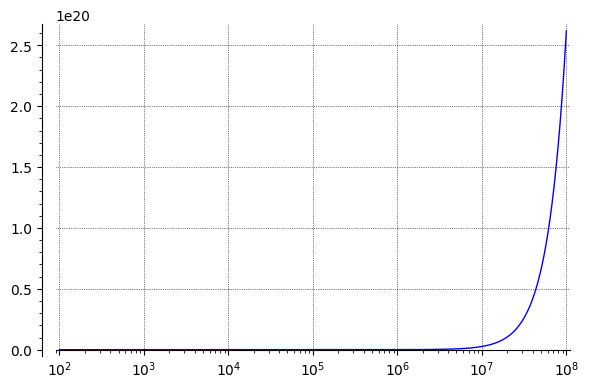

In [46]:
plot(cond2sub.subs(DEg=DEgval,D1=7)/(2*np.pi),(C,1e2,1e8),  scale='semilogx',gridlines=True)

In [23]:
cond1sub.subs(DEg=minsolDEg,D1=minsolD1)/(2*np.pi)

-1.00000000000000

In [24]:
cond2sub.subs(DEg=minsolDEg,D1=minsolD1,C=Cval)/(2*np.pi)

100000.000000000

In [73]:
# parameter substitution 

phival = 1/4 * np.pi 
R_fval = 1
gamma_fval = gamma
gamma_gval = gamma
DEgval = minsolDEg#*0.999
Deg2val = 0  
Deg1val = minsolDEg*minsolD1   #*0.99999

In [74]:
eff_hval = eff_hamiltonian_tayl.subs(DEg=DEgval,C=Cval,phi=phival,R_f=R_fval,gamma_f=gamma_fval,gamma_g=gamma_gval,Deg2=Deg2val,Deg1= Deg1val)
eff_hval = (eff_hval + conjugate(eff_hval))

a_val = eff_hval[0,0]
b_val = eff_hval[1,1]
c_val = eff_hval[3,3]
d_val = eff_hval[4,4]
e_val = eff_hval[5,5]
f_val = eff_hval[7,7]

In [75]:
U = sg.copy(eff_hval)

tgval = np.pi /(a_val+e_val-b_val-d_val)

t1 = (a_val-b_val)*tgval
t2 = t1
t3 = (a_val-d_val)*tgval

R = 0*[0 , t1, t2, t1+t2, t3, t1+t3, t2+t3, t1+t2+t3 ]

for i in range(8):
    try:
        U[i,i] = np.exp( (R[i] + (eff_hval[i,i]-a_val)*tgval ) *I )
        print((R[i] + (eff_hval[i,i]-a_val)*tgval))
    except:
        print(i)


for i in range(8):
    U[i,i] = U[i,i]

0
1
2
3
4
5
6
7


In [76]:
show(symround(U,digits=5))

symround: Deleted coefficient 1.9858e-22


[0.0041601*Omega^2/gamma                       0                       0                       0                       0                       0                       0                       0]
[                      0 0.0041601*Omega^2/gamma                       0                       0                       0                       0                       0                       0]
[                      0                       0 0.0041601*Omega^2/gamma                       0                       0                       0                       0                       0]
[                      0                       0                       0 0.0041601*Omega^2/gamma                       0                       0                       0                       0]
[                      0                       0                       0                       0 0.0041601*Omega^2/gamma                       0                       0                       0]
[                      0                       0                       0                       0                       0 0.0041601*Omega^2/gamma                       0                       0]
[                      0                       0                       0                       0                       0                       0 0.0041601*Omega^2/gamma                       0]
[                      0                       0                       0                       0                       0                       0                       0                       0]

In [642]:
mx = -100   #maximum value of exponent
m = 1       #exponent of detunings

phival = 1/4* np.pi 
R_fval = 1
gammaval = 0.01
kappa_cval = 1
kappa_bval = 0.9
gamma_fval = gammaval
gamma_gval = gammaval
DEgval = minsolDEg#*0.999
Deg2val = 0 
Deg1val = minsolDEg*minsolD1   #*0.99999

for lindop in range(13):
    show(lindop,eff_lind_coeff[lindop]  )
    pos = 0
    more = True
    while(more):
        try: 
            err = eff_lind[lindop][pos].subs(kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val,Deg2=Deg2val,DEg=DEgval,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival)
            err = err._mathematica_().Together()._sage_() 
            exp = obtain_expr_exp(err)
            if exp > mx:
                mx = exp
            pos += 1
            print(exp)
        except IndexError:
            more = False

0 sqrt(kappa_c)

-3/2
-3/2
-3/2
-3/2
-3/2
-3/2
-3/2
-3/2


1 sqrt(gamma)

-2
-2
-2
-2


2 sqrt(kappa_b)

-1
-1
-1
-1
-1
-1
-1
-1


3 sqrt(kappa_c)

-3/2
-3/2
-3/2
-3/2
-3/2
-3/2
-3/2
-3/2


4 sqrt(gamma)

-1
-1
-1
-1


5 sqrt(kappa_b)

-1
-1
-1
-1
-1
-1
-1
-1


6 sqrt(kappa_c)

-3/2
-3/2
-3/2
-3/2
-3/2
-3/2
-3/2
-3/2


7 sqrt(gamma_g)

-1
-1
-1
-1
-1
-1
-1
-1


8 sqrt(gamma_f)

-1
-1
-1
-1
-1
-1
-1
-1


9 sqrt(kappa_b)

-1
-1
-1
-1
-1
-1
-1
-1


10 sqrt(kappa_c)

-3/2
-3/2
-3/2
-3/2
-3/2
-3/2
-3/2
-3/2


11 sqrt(gamma)

-1
-1
-1
-1


12 sqrt(kappa_b)

-1
-1
-1
-1
-1
-1
-1
-1


In [765]:
preparse('12.34')

"RealNumber('12.34')"

In [976]:
R = RealField(53); R

Real Field with 53 bits of precision

In [977]:
RealNumber = R

In [978]:
(12.34).parent()

Real Field with 53 bits of precision

In [800]:
ComplexNumber = ComplexField(100)

In [328]:
a = eff_hamiltonian_tayl[0,0]
#a = symround( MMA_simplify(a,full=False) ,digits = 14)
b = eff_hamiltonian_tayl[1,1]
#b = symround(MMA_simplify(b,full=False),digits = 14)
c = eff_hamiltonian_tayl[3,3]
#c = symround(MMA_simplify(c,full=False),digits = 14)
d = eff_hamiltonian_tayl[4,4]
#d = symround(MMA_simplify(d,full=False),digits = 14)
e = eff_hamiltonian_tayl[5,5]
#e = symround(MMA_simplify(e,full=False),digits = 14)
f = eff_hamiltonian_tayl[7,7]
#f = symround(MMA_simplify(f,full=False),digits = 14)

In [70]:
show(symround(a))

symround: Deleted coefficient 1.1e-16
symround: Deleted coefficient 1.1e-16


0.50*(C^4*(e^(4*I*phi) - 1)^2 - 4*C^3*e^(4*I*phi) - 1.2*C^2*e^(4*I*phi) - 0.12*C*e^(4*I*phi) - 0.0039*e^(4*I*phi))*Omega^2/(((2*I*C^3 + 1.2*I*C^2 + 0.19*I*C + 0.0078*I)*R_f*e^(4*I*phi) + (C^4*(e^(4*I*phi) - 1)^2 - 4*C^3*e^(4*I*phi) - 1.2*C^2*e^(4*I*phi) - 0.12*C*e^(4*I*phi) - 0.0039*e^(4*I*phi))*DEg)*C*gamma + (-0.50*I*C^4*(e^(4*I*phi) - 1)^2 + 2*I*C^3*e^(4*I*phi) + 0.62*I*C^2*e^(4*I*phi) + 0.062*I*C*e^(4*I*phi) + 0.0020*I*e^(4*I*phi))*gamma_f + (-0.50*I*C^4*(e^(4*I*phi) - 1)^2 + 2*I*C^3*e^(4*I*phi) + 0.62*I*C^2*e^(4*I*phi) + 0.062*I*C*e^(4*I*phi) + 0.0020*I*e^(4*I*phi))*gamma_g)

In [78]:
show(symround(b))

symround: Deleted coefficient 1.1e-16
symround: Deleted coefficient 1.1e-16


0.50*(C^5*Deg2*(e^(4*I*phi) - 1)^2 - ((4*Deg2 - 3*I)*e^(4*I*phi) + 0.50*I*e^(8*I*phi) + 0.50*I)*C^4 + C^3*(-1.2*Deg2 + 3.2*I)*e^(4*I*phi) + C^2*(-0.12*Deg2 + 0.81*I)*e^(4*I*phi) + C*(-0.0039*Deg2 + 0.070*I)*e^(4*I*phi) + 0.0020*I*e^(4*I*phi))*Omega^2/(((2*I*C^4*Deg2 + C^3*(1.2*I*Deg2 + 1.8) + C^2*(0.19*I*Deg2 + 0.88) + C*(0.0078*I*Deg2 + 0.11) + 0.0039)*R_f*e^(4*I*phi) + (C^5*Deg2*(e^(4*I*phi) - 1)^2 - ((4*Deg2 - 3*I)*e^(4*I*phi) + 0.50*I*e^(8*I*phi) + 0.50*I)*C^4 + C^3*(-1.2*Deg2 + 3.2*I)*e^(4*I*phi) + C^2*(-0.12*Deg2 + 0.81*I)*e^(4*I*phi) + C*(-0.0039*Deg2 + 0.070*I)*e^(4*I*phi) + 0.0020*I*e^(4*I*phi))*DEg)*C*gamma + (-0.50*I*C^5*Deg2*(e^(4*I*phi) - 1)^2 + ((2*I*Deg2 + 1.5)*e^(4*I*phi) - 0.25*e^(8*I*phi) - 0.25)*C^4 + C^3*(0.62*I*Deg2 + 1.6)*e^(4*I*phi) + C^2*(0.062*I*Deg2 + 0.41)*e^(4*I*phi) + C*(0.0020*I*Deg2 + 0.035)*e^(4*I*phi) + 0.00098*e^(4*I*phi))*gamma_f + (-0.50*I*C^5*Deg2*(e^(4*I*phi) - 1)^2 + ((2*I*Deg2 + 1.5)*e^(4*I*phi) - 0.25*e^(8*I*phi) - 0.25)*C^4 + C^3*(0.62*I*Deg2 + 1.6)*e^(4*I*phi) + C^2*(0.062*I*Deg2 + 0.41)*e^(4*I*phi) + C*(0.0020*I*Deg2 + 0.035)*e^(4*I*phi) + 0.00098*e^(4*I*phi))*gamma_g)

In [330]:
mx = -100   #maximum value of exponent
m = 1/2       #exponent of detunings

phival = 0 * np.pi 
R_fval = 1
gammaval = 1
kappa_cval = 1
kappa_bval = 1
gamma_fval = gammaval
gamma_gval = gammaval
DEgval = 1
Deg2val = DEgval*minsolD2  #*0.99999
Deg1val = DEgval*minsolD1

for lindop in range(13):
    show(lindop,eff_lind_coeff[lindop]  )
    pos = 0
    more = True
    while(more):
        try: 
            err = eff_lind[lindop][pos].subs(kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val*C^m,Deg2=Deg2val*C^m,DEg=DEgval,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival)
            err = err*conjugate(err)
            err = err._mathematica_().Together()._sage_() 
            exp = obtain_expr_exp(err)
            if exp > mx:
                mx = exp
            pos += 1
            print(exp)
        except IndexError:
            more = False

0 sqrt(kappa_c)

-1
-1
-1
-1
-1
-1
-1
-1


1 sqrt(gamma)

-2
-2
-2
-2


2 sqrt(kappa_b)

-2
-2
-2
-2
-2
-2
-2
-1


3 sqrt(kappa_c)

-1
-1
-1
-1
-1
-1
-1
-1


4 sqrt(gamma)

-2
-2
-2
-2


5 sqrt(kappa_b)

-2
-2
-2
-2
-2
-2
-2
-1


6 sqrt(kappa_c)

-1
-1
-1
-1
-1
-1
-1
-1


7 sqrt(gamma_g)

-2
-2
-2
-2
-2
-2
-2
-2


8 sqrt(gamma_f)

-2
-2
-2
-2
-2
-2
-2
-2


9 sqrt(kappa_b)

-2
-2
-2
-2
-2
-2
-2
-2


10 sqrt(kappa_c)

-1
-1
-1
-1
-1
-1
-1
-1


11 sqrt(gamma)

-2
-2
-2
-2


12 sqrt(kappa_b)

-2
-2
-2
-2
-2
-2
-2
-2


In [349]:
q = f.subs(kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val*C^m,Deg2=Deg2val*C^m,DEg=DEgval,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival)
q = (q+conjugate(q))._mathematica_().Together()._sage_()
q = symround(q.subs(kappa_c=kappa_cval,kappa_b=kappa_bval,Omega=1, R_f=R_fval,Deg1=Deg1val*C^m,Deg2=Deg2val,DEg=DEgval*C^m,gamma_g=gamma_gval,gamma=gammaval,gamma_f=gamma_fval, phi=phival))

show(q._mathematica_().Numerator().Collect('C')._sage_())

symround: Deleted coefficient -3.6e-15
symround: Deleted coefficient 2.8e-14
symround: Deleted coefficient -2.8e-14
symround: Deleted coefficient -3.3e-14
symround: Deleted coefficient 4.3e-14
symround: Deleted coefficient 1.2e-13
symround: Deleted coefficient 1.1e-13
symround: Deleted coefficient 4.6e-13
symround: Deleted coefficient 5.7e-14
symround: Deleted coefficient -2.7e-13
symround: Deleted coefficient -4.0e-13
symround: Deleted coefficient 3.4e-13
symround: Deleted coefficient -5.7e-13
symround: Deleted coefficient 2.0e-13
symround: Deleted coefficient -4.5e-13
symround: Deleted coefficient 8.5e-14
symround: Deleted coefficient -2.8e-14
symround: Deleted coefficient 4.0e-13
symround: Deleted coefficient 2.3e-13
symround: Deleted coefficient -3.8e-13
symround: Deleted coefficient 1.6e-13
symround: Deleted coefficient -1.4e-14
symround: Deleted coefficient 7.1e-14
symround: Deleted coefficient -8.9e-14
symround: Deleted coefficient 2.1e-14
symround: Deleted coefficient 3.6e-15
s

-C^33.5000000000000 - 3*C^33 - 9.75000000000000*C^32.5000000000000 - 10.3800000000000*C^32 - 43*C^31.5000000000000 - 19.2500000000000*C^31 - 125*C^30.5000000000000 - 27.2500000000000*C^30 - 276*C^29.5000000000000 - 17.2500000000000*C^29 - 500*C^28.5000000000000 + 15*C^28 - 760*C^27.5000000000000 + 66*C^27 - 992*C^26.5000000000000 + 126*C^26 - 1120*C^25.5000000000000 + 168*C^25 - 1104*C^24.5000000000000 + 182*C^24 - (976.000000000000 + 1.47800000000000e-12*I)*C^23.5000000000000 + 166*C^23 - 752*C^22.5000000000000 + 127*C^22 - 512*C^21.5000000000000 + 85*C^21 - 308*C^20.5000000000000 + 48*C^20 - 164*C^19.5000000000000 + 23.5000000000000*C^19 - 76*C^18.5000000000000 + 9.75000000000000*C^18 - 30.5000000000000*C^17.5000000000000 + 3.37500000000000*C^17 - 10.5000000000000*C^16.5000000000000 + 0.968800000000000*C^16 - 3.03100000000000*C^15.5000000000000 + 0.226600000000000*C^15 - 0.734400000000000*C^14.5000000000000 + 0.0419900000000000*C^14 - 0.148400000000000*C^13.5000000000000 + 0.00604200000000000*C^13 - 0.0241700000000000*C^12.5000000000000 + 0.000679000000000000*C^12 - 0.00317400000000000*C^11.5000000000000 + 0.0000591300000000000*C^11 - 0.000331900000000000*C^10.5000000000000 + (3.93400000000000e-6)*C^10 - 0.0000271800000000000*C^9.50000000000000 + (1.95600000000000e-7)*C^9 - (1.71400000000000e-6)*C^8.50000000000000 + (7.04300000000000e-9)*C^8 - (8.19600000000000e-8)*C^7.50000000000000 + (1.76400000000000e-10)*C^7 - (2.82300000000000e-9)*C^6.50000000000000 + (2.72800000000000e-12)*C^6 - (6.73000000000000e-11)*C^5.50000000000000

In [350]:
show(q._mathematica_().Denominator().Collect('C')._sage_())

24.8550913100000*C^31.0000000000000 + 10.1689828025000*C^30.0000000000000 + (77.5156250000000*C^2.50000000000000 + 16.17187500000000*C^1.50000000000000 - 33.1079011415407 - 1.42108547152020e-14*I)*C^28 + (73.6554160544155 - 3.55271367880050e-15*I)*C^29.0000000000000 + 0.810937500000000*C^(57/2) + (-77.1250000000000*C^3.50000000000000 - 18.78514999999997*C^2.50000000000000 - 1.10119250000000*C^1.50000000000000 - 71.9681890249677 - 5.68434188608080e-14*I)*C^27 + (91.2624568163341 - 3.66373598126302e-15*I)*C^28.0000000000000 + 0.00519000000000003*C^(55/2) - 0.01831151619120000*C^27.5000000000000 + ((2.69394000000005 - 2.84217094304040e-14*I)*C^3.50000000000000 + 28.83331291125617*C^2.50000000000000 + (5.91698800801875 - 3.55271367880050e-15*I)*C^1.50000000000000 - 98.2420386773524 + 4.26325641456060e-14*I)*C^26 + (212.126878369412 + 1.20736753927986e-14*I)*C^27.0000000000000 + (-(6.93889390390723e-17*I)*C^3.50000000000000 + 1.93106925000000*C^2.50000000000000 + 0.4028737500000000*C^1.50000000000000 - 1.283569304319163)*C^(51/2) + (0.294596869299375 - 6.66133814775094e-16*I)*C^(53/2) - 0.1831151619120000*C^26.5000000000000 + (31.2500000000000*C^7.00000000000000 + 15.6250000000000*C^6.00000000000000 + 95.2225787500000*C^5.00000000000000 + 38.75382500000001*C^4.00000000000000 - (28.3995866472499 + 8.52651282912120e-14*I)*C^3.50000000000000 + 4.02471826250000*C^3.00000000000000 - 129.7932939397963*C^2.50000000000000 - (26.0407928723381 + 7.10542735760100e-15*I)*C^1.50000000000000 - 109.3823875883298 + 2.131628207280301e-13*I)*C^25 + (321.003525131621 + 3.10723669016966e-14*I)*C^26.0000000000000 + (-(1.28089200000000 - 5.78870285039557e-17*I)*C^3.50000000000000 - (0.742277495280000 - 8.88178419700125e-16*I)*C^2.50000000000000 - (0.108059619840000 + 2.22044604925031e-16*I)*C^1.50000000000000 - 2.39801800437019 - 6.10622663543836e-16*I)*C^(49/2) - (1.623820774232946 + 1.114559833315099e-16*I)*C^25.5000000000000 + (-6.83000000000000*C^7.00000000000000 - (125.852480000000 - 7.10542735760100e-15*I)*C^6.00000000000000 - (76.9650168116000 - 2.66453525910038e-14*I)*C^5.00000000000000 - 16.76845942960002*C^4.00000000000000 + (123.2811190020182 + 1.421085471520200e-13*I)*C^3.50000000000000 - 1.278636579452001*C^3.00000000000000 - (198.400670532357 - 2.84217094304040e-14*I)*C^2.50000000000000 - (45.8960952511143 + 2.66453525910038e-15*I)*C^1.50000000000000 + 10.05446036396557 - 1.989519660128281e-13*I)*C^24 + (437.414235871631 - 8.88004947352528e-15*I)*C^25.0000000000000 + ((0.332890419839999 + 6.32306706993546e-16*I)*C^3.50000000000000 - 0.399078533261876*C^2.50000000000000 - (0.0954214324644422 - 1.11022302462516e-16*I)*C^1.50000000000000 - 1.49495614482728 - 2.22044604925031e-16*I)*C^(47/2) - (3.19711695501201 - 1.07336015076065e-16*I)*C^24.5000000000000 + (14.6484375000000*C^8.50000000000000 + 21.9726562500000*C^7.50000000000000 + 73.4086973125000*C^7.00000000000000 - 279.589843750000*C^6.50000000000000 + (68.5245677858500 + 2.84217094304040e-14*I)*C^6.00000000000000 - 189.819335937500*C^5.50000000000000 - (1.576068436824164 + 1.731947918415244e-14*I)*C^5.00000000000000 + 4.80468750000000*C^4.50000000000000 - (6.88814879311262 - 1.42108547152020e-14*I)*C^4.00000000000000 + (237.367451675131 + 8.88178419700125e-14*I)*C^3.50000000000000 - (0.881698700972370 + 1.77635683940025e-15*I)*C^3.00000000000000 - (85.0652444095229 - 4.54081217071689e-14*I)*C^2.50000000000000 - (26.24424936387340 - 3.837034856513100e-14*I)*C^1.50000000000000 + 107.8247562466610 - 1.023161590174570e-15*I)*C^23 + (479.939698775640 - 1.03621972113999e-13*I)*C^24.0000000000000 + (0.519000000000000*C^7.00000000000000 + 0.259500000000000*C^6.00000000000000 + 1.581456587880000*C^5.00000000000000 + 0.643623525600000*C^4.00000000000000 + (0.717769688692547 + 8.88178419700125e-16*I)*C^3.50000000000000 + 0.0668425209036000*C^3.00000000000000 - (2.66764586178404 + 4.44089209850063e-15*I)*C^2.50000000000000 - 0.582768758747782*C^1.50000000000000 - 0.747461341702930 - 1.11022302462516